In [1]:
# Warmup 1a: Sort this list by the length of each word using a normal function

fruits = ["blackberry", "apple", "banana", "fig", "blueberry", "strawberry"]

def get_fruit_len(f):
    return len(f)

# Why might we use sorted rather than sort?
sorted(fruits, key=get_fruit_len)

['fig', 'apple', 'banana', 'blueberry', 'blackberry', 'strawberry']

In [2]:
# Warmup 1b: Sort this list by the length of each word using a lambda
fruits = ["blackberry", "apple", "banana", "fig", "blueberry", "strawberry"]
sorted(fruits, key=lambda f:len(f))

['fig', 'apple', 'banana', 'blueberry', 'blackberry', 'strawberry']

In [3]:
# Warmup 2: Define: What is a lambda function? 
# A lambda is an abstraction (think: shortcut) to creating a function
# We remove the def, name, and return statement of the function definition.
# We just describe the parameter and the return value

In [4]:
# Warmup 3: Sort this dictionary by their total enrollment

enrollments = { "Wisconsin": 45540,
                "Michigan": 47907,
                "Illinois": 52331,
                "Iowa": 30448,
                "Minnesota": 52017,
                "Ohio State": 61369,
                "Northwestern": 22316}

enrollment_tuples = enrollments.items()
sorted_enrollment_tuples = sorted(enrollment_tuples, key=lambda t: t[1])
dict(sorted_enrollment_tuples)

{'Northwestern': 22316,
 'Iowa': 30448,
 'Wisconsin': 45540,
 'Michigan': 47907,
 'Minnesota': 52017,
 'Illinois': 52331,
 'Ohio State': 61369}

In [5]:
# Warmup 4: Sort this list of dictionaries by 'name'
volunteers = [  {"name": "Sky", "hours": 53}, 
                {"name":"Patrice", "hours": 72},
                {"name":"Gabriella", "hours": 45},
                {"name": "Jade", "hours": 62} ]

sorted(volunteers, key = lambda d:d['hours'])

[{'name': 'Gabriella', 'hours': 45},
 {'name': 'Sky', 'hours': 53},
 {'name': 'Jade', 'hours': 62},
 {'name': 'Patrice', 'hours': 72}]

In [6]:
# Warmup 5: Sort this dictionary of lists by the length of list
cities_by_county = {"Dane": ["Madison", "Sun Prairie", "Middleton", "Waunakee"],
                   "Milwaukee": ["Milwaukee", "West Allis", "Wauwatosa"],
                   "Rock": ["Janesville", "Beloit"],
                   "Waukesha": ["Brookfield"]}
cities_by_county_tuples = cities_by_county.items()
sorted_cities_by_county_tuples = sorted(cities_by_county_tuples, key = lambda t: len(t[1]))
dict(sorted_cities_by_county_tuples)

{'Waukesha': ['Brookfield'],
 'Rock': ['Janesville', 'Beloit'],
 'Milwaukee': ['Milwaukee', 'West Allis', 'Wauwatosa'],
 'Dane': ['Madison', 'Sun Prairie', 'Middleton', 'Waunakee']}

In [7]:
# Warmup 6: Create a list of all fruits that contain 'berry'
fruits = ["blackberry", "apple", "banana", "fig", "blueberry", "strawberry"]

berry_good_fruits = []
for fruit in fruits:
    if 'berry' in fruit:
        berry_good_fruits.append(fruit)
berry_good_fruits

['blackberry', 'blueberry', 'strawberry']

# Lecture 24: Iterators and Comprehensions

Learning Objectives:

 - Create list and dictionary comprehensions

 - Use the correct vocabulary to describe iteration
   - iterable, sequence, iterator

 - Determine if an object is an iterable, or if it is an iterator
   - try to use iter() to determine if an object is an iterable
   - try to use next() to determine if an object is an iterator

 - Use iterator/iterable language to open and process files

## List Comprehensions

In [8]:
# Do we have a shorter way to complete Warmup 6?
# https://en.wikipedia.org/wiki/Code_golf
# Yes! Using List Comprehensions
fruits = ["blackberry", "apple", "banana", "fig", "blueberry", "strawberry"]

[f for f in fruits if 'berry' in f]

['blackberry', 'blueberry', 'strawberry']

In [9]:
# What other ways could we filter our fruits list?
fruits = ["blackberry", "apple", "banana", "fig", "blueberry", "strawberry"]

# All fruits that contain berry (we just did this!)
# All fruits that start with the letter 'b'
# All fruits with short names
# The length of every fruit name
# ...

In [10]:
# All fruits that start with the letter 'b'
[f for f in fruits if f.startswith('b')]

['blackberry', 'banana', 'blueberry']

In [11]:
# All fruits with short names
[f for f in fruits if len(f) < 6]

['apple', 'fig']

In [12]:
# The length of every fruit name
[len(f) for f in fruits]

[10, 5, 6, 3, 9, 10]

### More List Comprehensions

In [13]:
# Convert these Fahrenheit temps to an int in Celsius using C = 5/9 * (F-32)
temps = [32, 45, 90, 212]

# First, write using a traditional for loop...
cel_temps = []
for f in temps:
    temp_cel = (5/9) * (f-32)
    cel_temps.append(temp_cel)
cel_temps

[0.0, 7.222222222222222, 32.22222222222222, 100.0]

In [14]:
# Then, try writing it as a list comprehension!
[5/9 * (f-32) for f in temps]

[0.0, 7.222222222222222, 32.22222222222222, 100.0]

In [15]:
# What if temps were strings?
temps = ["32", "", "45", "90", "212"]
[5/9 * (int(f)-32) for f in temps if f != ""]

[0.0, 7.222222222222222, 32.22222222222222, 100.0]

### Even More List Comprehensions

In [16]:
# What ways could we filter this list of volunteers?
volunteers = [  {"name": "Sky", "hours": 53}, 
                {"name": "Patrice", "hours": 72},
                {"name": "Gabriella", "hours": 45},
                {"name": "Jade", "hours": 62}
             ]

# Those that have volunteered atleast 60 hours
# Those with short names
# ...

In [17]:
# Those that have volunteered atleast 60 hours
[d['name'] for d in volunteers if d['hours'] > 60]

['Patrice', 'Jade']

In [18]:
# Those with short names
[d['name'] for d in volunteers if len(d['name']) < 5]

['Sky', 'Jade']

In [19]:
# What if we wanted to keep the name and hours?
[d for d in volunteers if len(d['name']) < 5]

[{'name': 'Sky', 'hours': 53}, {'name': 'Jade', 'hours': 62}]

### Dictionary Comprehensions
Same thing as a list comprehension, but with a key *and* value!

In [20]:
# What ways could we filter this dictionary of people's scores?
scores_dict = {"Bob": [18, 72, 83], 
               "Cindy" : [27, 11, 55, 73, 87], 
               "Alice": [16, 33, 42, 89, 90], 
               "Meena": [39, 93, 9, 3, 55, 72, 19]}

# A dictionary of how many scores each player has
# A dictionary of everyone's highest score
# A dictionary of everyone's average score
# ...

In [21]:
# A dictionary of how many scores each player has
{player : len(scores) for (player, scores) in scores_dict.items()}

{'Bob': 3, 'Cindy': 5, 'Alice': 5, 'Meena': 7}

In [22]:
# A dictionary of everyone's highest score
{player : max(scores) for (player, scores) in scores_dict.items()}

{'Bob': 83, 'Cindy': 87, 'Alice': 90, 'Meena': 93}

In [23]:
# A dictionary of everyone's average score
{player : sum(scores) / len(scores) for (player, scores) in scores_dict.items()}

{'Bob': 57.666666666666664,
 'Cindy': 50.6,
 'Alice': 54.0,
 'Meena': 41.42857142857143}

In [24]:
# Challenge: A sorted dictionary of everyone's average score.
avg_scores = {player : sum(scores) / len(scores) for (player, scores) in scores_dict.items()}
# Convert the dictionary to a list of tuples, sort based on the score, and turn back into a dict.
dict(sorted(avg_scores.items(), key=lambda t: t[1]))

{'Meena': 41.42857142857143,
 'Cindy': 50.6,
 'Alice': 54.0,
 'Bob': 57.666666666666664}

### The Syntax of Comprehensions

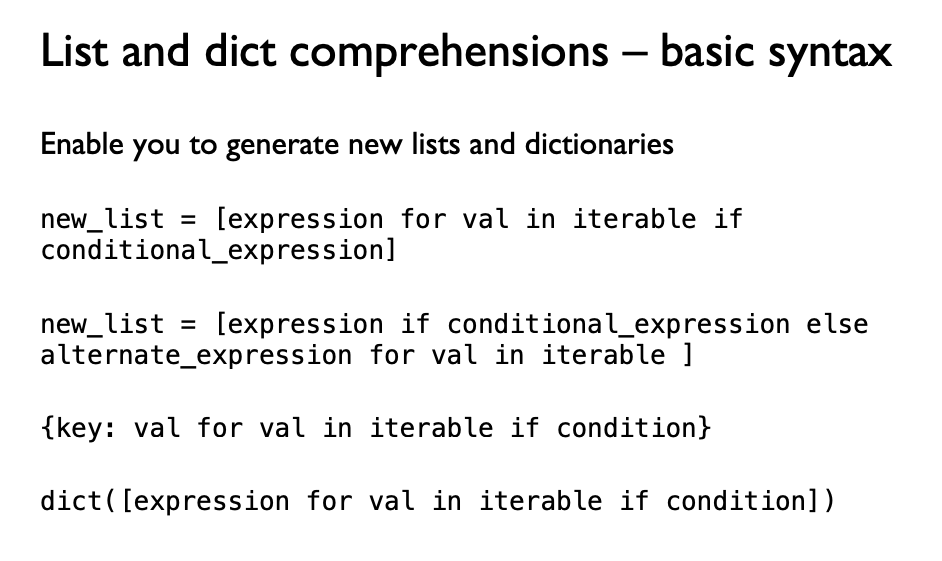

For more reference, visit...

https://www.w3schools.com/python/python_lists_comprehension.asp

https://www.datacamp.com/community/tutorials/python-dictionary-comprehension

### Challenge: Recursion, Lambdas, and Comprehensions Together!
Sort the family tree as a list of people from youngest to oldest.

Expected Output:

```
[{'name': 'Jayden', 'age': 1},
 {'name': 'Penelope', 'age': 24},
 {'name': 'Skyla', 'age': 46},
 {'name': 'Julia', 'age': 66},
 {'name': 'Irine', 'age': 92},
 {'name': 'Dot', 'age': 111}]
```

In [25]:
family_tree = {
    "name": "Jayden",
    "age": 1,
    "mother": {
        "name": "Penelope",
        "age": 24,
        "mother": {
            "name": "Skyla",
            "age": 46,
            "mother": {
                "name": "Julia",
                "age": 66,
                "mother": {
                    "name": "Irine",
                    "age": 92,
                    "mother": {
                        "name": "Dot",
                        "age": 111,
                    }
                }
            }
        }
    }
}

def get_person_info(person):
    return {k: v for (k, v) in person.items() if k != 'mother'}

def get_people(person):
    person_info = get_person_info(person)
    if 'mother' not in person:
        return [person_info]
    else:
        current_mother = person['mother']
        return get_people(current_mother) + [person_info]

family_list = get_people(family_tree)
sorted(family_list, key=lambda d:d['age'])

[{'name': 'Jayden', 'age': 1},
 {'name': 'Penelope', 'age': 24},
 {'name': 'Skyla', 'age': 46},
 {'name': 'Julia', 'age': 66},
 {'name': 'Irine', 'age': 92},
 {'name': 'Dot', 'age': 111}]